## Project Name: - Voyage Analytics: Integrating MLOps in Travel
### Project Type: - Productionization of ML Systems
### Contribution: - Individual - Archit Dhodi

GitHub Repository: https://github.com/ArchitDhodi/Voyage-Analytics-Integrating-MLOps-in-Travel


## Problem Statement: -
In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.



In [ ]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings
from datetime import datetime
import time
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import mlflow
import mlflow.sklearn

# Resolve project root when running in Jupyter (no __file__) and set local MLflow store
CWD = Path.cwd().resolve()
ROOT = CWD.parent if CWD.name == 'notebooks' else CWD
MLFLOW_DIR = (ROOT / 'mlruns_local').resolve()
MLFLOW_TRACKING_URI = f'file://{MLFLOW_DIR}'
os.environ['MLFLOW_TRACKING_URI'] = MLFLOW_TRACKING_URI
MLFLOW_DIR.mkdir(parents=True, exist_ok=True)
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment('abmsm_all_models')
DATA_DIR = ROOT / 'data'

In [ ]:
data = pd.read_csv(DATA_DIR / 'flights.csv')

In [3]:
# Check for duplicates
data.drop_duplicates(inplace = True)
data.reset_index()

,index,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
...,...,...,...,...,...,...,...,...,...,...,...
271883,271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020
271884,271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020
271885,271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020
271886,271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020


No duplicates found

In [4]:
# Dataset Rows & Columns count
lr= len(data.index)
lc= len(data.columns)
print("The number of rows is :-",lr)
print("The number of columns is :-",lc)

The number of rows is :- 271888
The number of columns is :- 10


In [5]:
# Checking for missing values
miss_values = data.isnull().sum().sort_values(ascending = False)
miss_values

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [7]:
# Statistical summary of dataset
data.describe(include = "all")

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
count,271888.000000,271888.000000,271888,271888,271888,271888.00000,271888.000000,271888.000000,271888,271888
unique,NaN,NaN,9,9,3,NaN,NaN,NaN,3,999
top,NaN,NaN,Florianopolis (SC),Florianopolis (SC),firstClass,NaN,NaN,NaN,Rainbow,09/26/2019
freq,NaN,NaN,57317,57317,116418,NaN,NaN,NaN,116752,1335
mean,67971.500000,667.505495,NaN,NaN,NaN,957.37503,1.421147,546.955535,NaN,NaN
std,39243.724665,389.523127,NaN,NaN,NaN,362.31189,0.542541,208.851288,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,301.51000,0.440000,168.220000,NaN,NaN
25%,33985.750000,326.000000,NaN,NaN,NaN,672.66000,1.040000,401.660000,NaN,NaN
50%,67971.500000,659.000000,NaN,NaN,NaN,904.00000,1.460000,562.140000,NaN,NaN
75%,101957.250000,1011.000000,NaN,NaN,NaN,1222.24000,1.760000,676.530000,NaN,NaN


For categorical variables, count, unique, top and mode of the column is available while for numerical 
columns, count, mean, standard deviation, minimum, maximum and 3 quartiles.

In [8]:
data.dtypes

travelCode      int64
userCode        int64
from           object
to             object
flightType     object
price         float64
time          float64
distance      float64
agency         object
date           object
dtype: object

In [9]:
# Checking unique values for each variable
print(data.apply(lambda col: col.unique()))

travelCode    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
userCode      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
from          [Recife (PE), Florianopolis (SC), Brasilia (DF...
to            [Florianopolis (SC), Recife (PE), Brasilia (DF...
flightType                      [firstClass, economic, premium]
price         [1434.38, 1292.29, 1487.52, 1127.36, 1684.05, ...
time          [1.76, 1.66, 2.16, 1.69, 1.11, 1.26, 0.72, 0.6...
distance      [676.53, 637.56, 830.86, 650.1, 425.98, 486.52...
agency                          [FlyingDrops, CloudFy, Rainbow]
date          [09/26/2019, 09/30/2019, 10/03/2019, 10/04/201...
dtype: object


In [10]:
# Checking number of unique values for each variable
print(data.apply(lambda col: col.nunique()))

travelCode    135944
userCode        1335
from               9
to                 9
flightType         3
price            490
time              33
distance          35
agency             3
date             999
dtype: int64


Data Wrangling Code

In [11]:
data.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [12]:
# Renaming columns to an easier one
data = data.rename(columns = {"travelCode":"travel_code",
                              "userCode":"user_code",
                              "flightType":"flight_type",
                              "from":"source",
                              "to":"destination"})

In [13]:
data

,travel_code,user_code,source,destination,flight_type,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
...,...,...,...,...,...,...,...,...,...,...
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020


In [14]:
data.dtypes

travel_code      int64
user_code        int64
source          object
destination     object
flight_type     object
price          float64
time           float64
distance       float64
agency          object
date            object
dtype: object

In [15]:
data["source"] = data["source"].astype("str")
data["destination"] = data["destination"].astype("str")
data["agency"] = data["agency"].astype("str")
data["flight_type"] = data["flight_type"].astype("str")
data["date"] = data["date"].astype("datetime64[ns]")

In [16]:
data.dtypes

travel_code             int64
user_code               int64
source                 object
destination            object
flight_type            object
price                 float64
time                  float64
distance              float64
agency                 object
date           datetime64[ns]
dtype: object

## Data Vizualization

In [ ]:
# Creating a function to print bar chart for the entered columns as inputs
def plot_bar_chart(df, x, y, t1, palette="pastel"):
  fig, ax = plt.subplots(figsize=(18,6))
  sns.barplot(data=df, x=x, y=y, ax=ax, palette=palette)
  plt.title(t1)
  #plt.xticks(dataset[x])
  plt.xlabel(x)
  plt.ylabel(y)

def count_plot(df, x, t1, hue=None, palette="pastel", top_n=10):
    # Get top N most frequent values in descending order
    top_categories = df[x].value_counts().index[:top_n]
    filtered_df = df[df[x].isin(top_categories)]

    fig, ax = plt.subplots(figsize=(18, 6))
    sns.countplot(data=filtered_df, x=x, hue=hue, ax=ax,
                  palette=palette, order=top_categories)

    ax.set_title(t1)
    ax.set_xlabel(x)

    # Add count labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

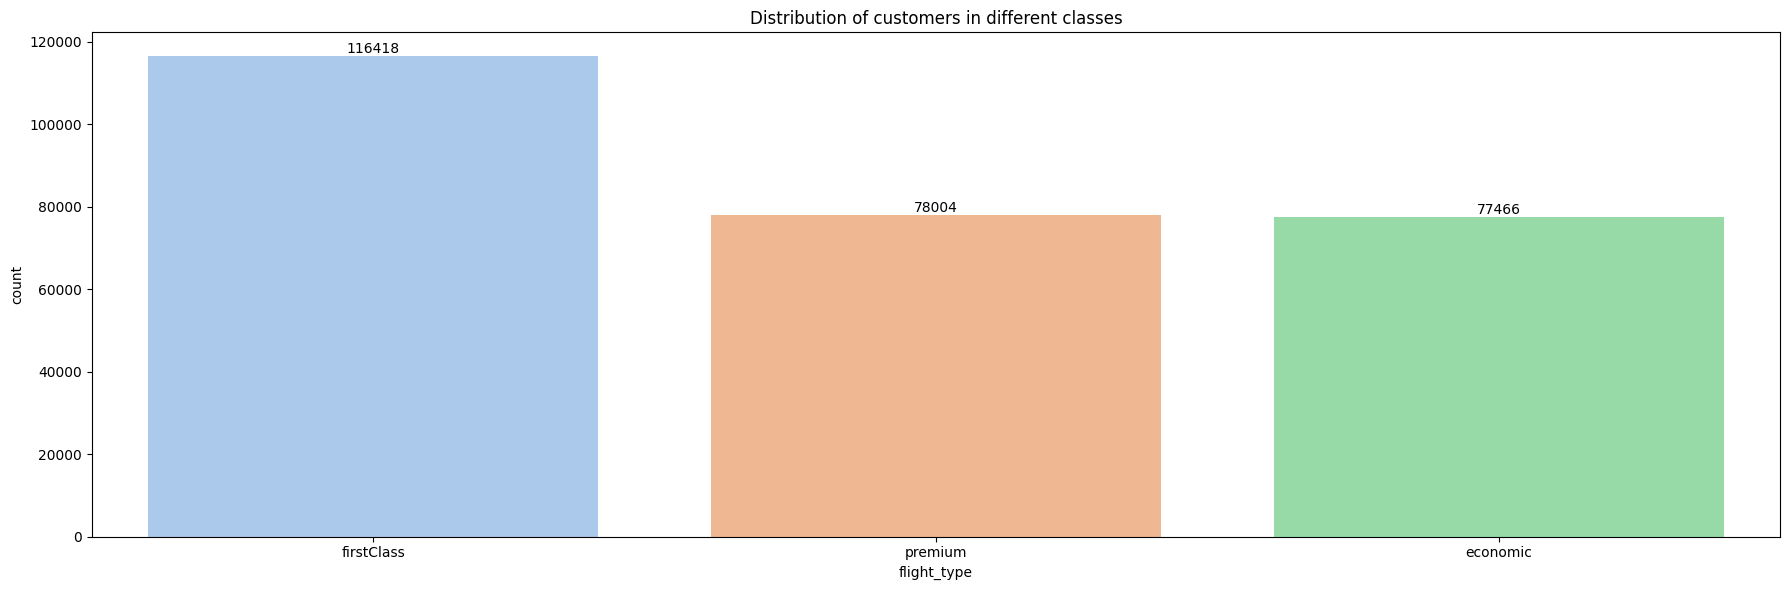

In [18]:
# Chart 1 
count_plot(data, "flight_type", "Distribution of customers in different classes")

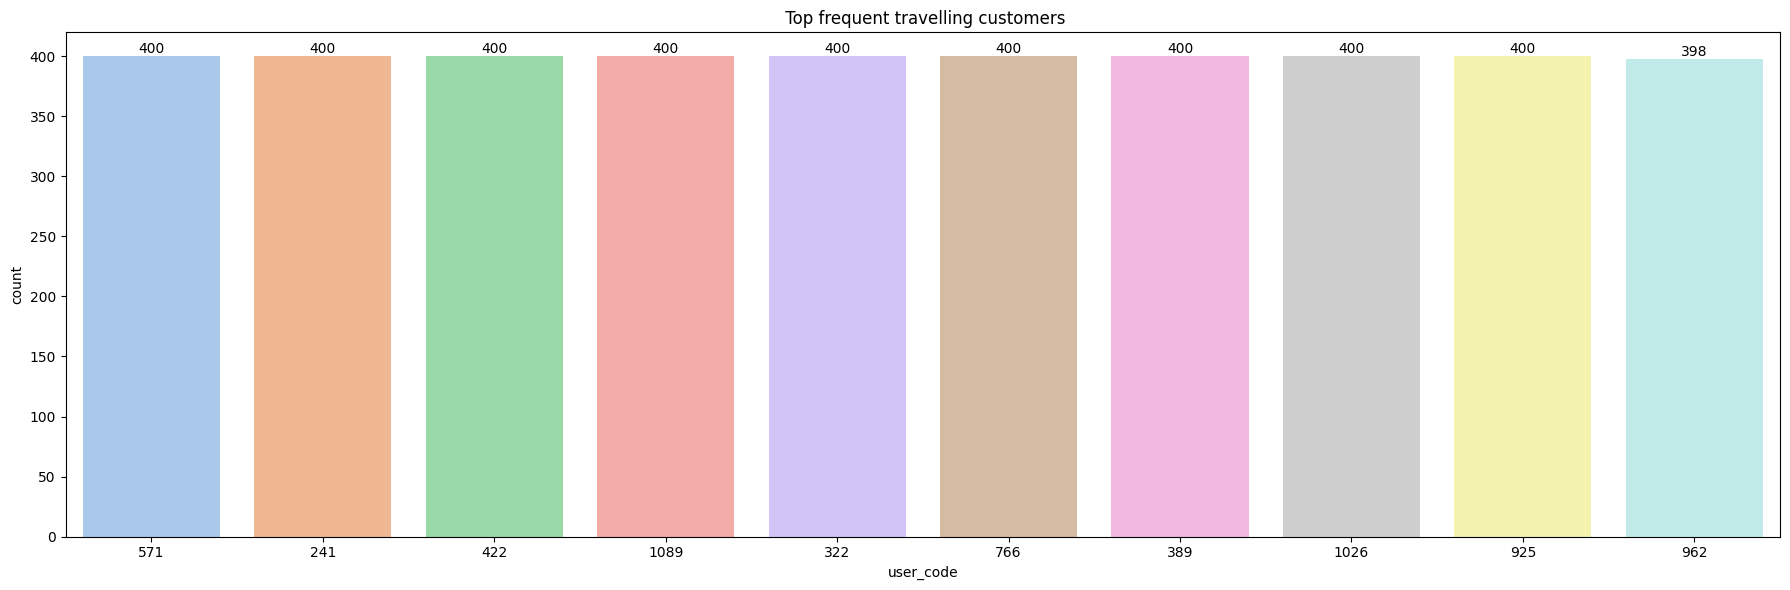

In [19]:
# Chart 2
count_plot(data, "user_code", " Top frequent travelling customers")

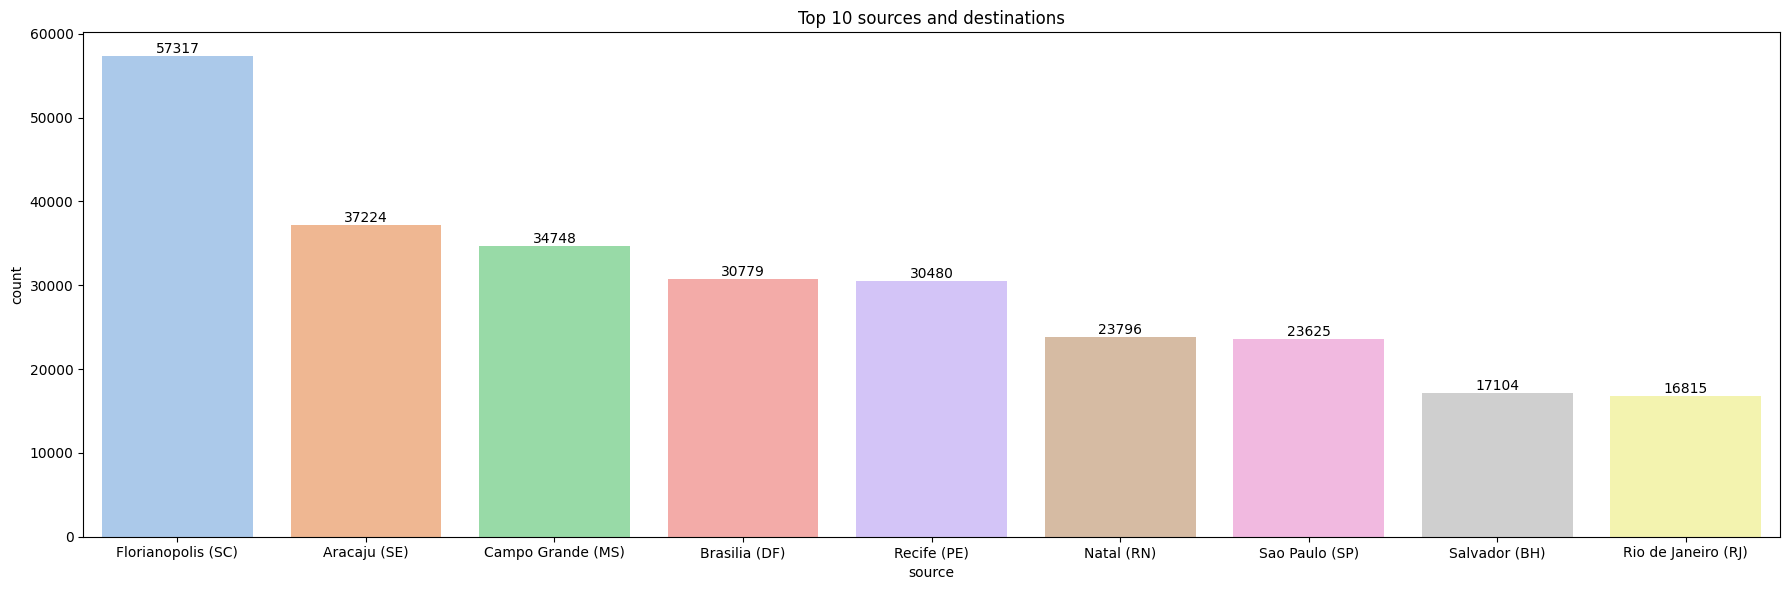

In [ ]:
# Chart 3
count_plot(data, "source", "Top 10 sources and destinations")

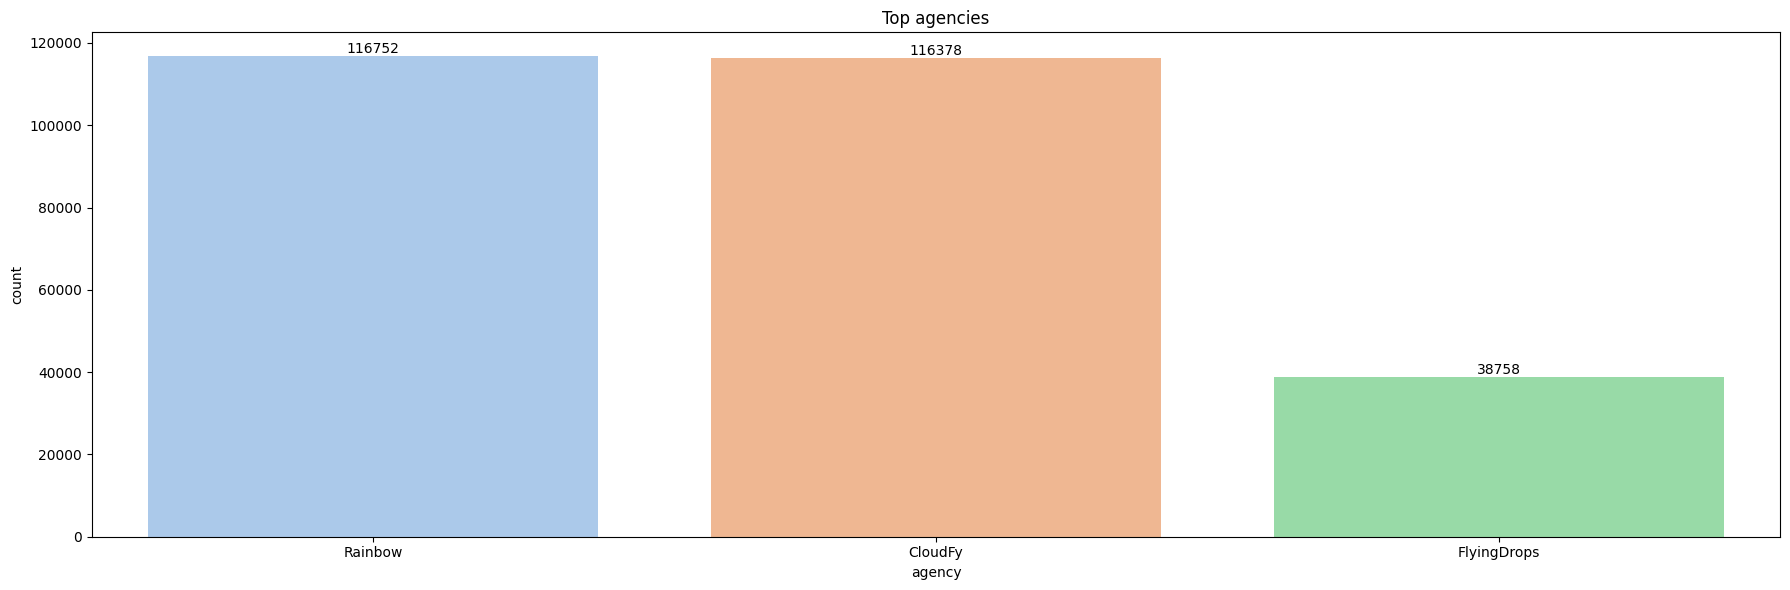

In [21]:
# chart 4
count_plot(data, "agency", "Top agencies")

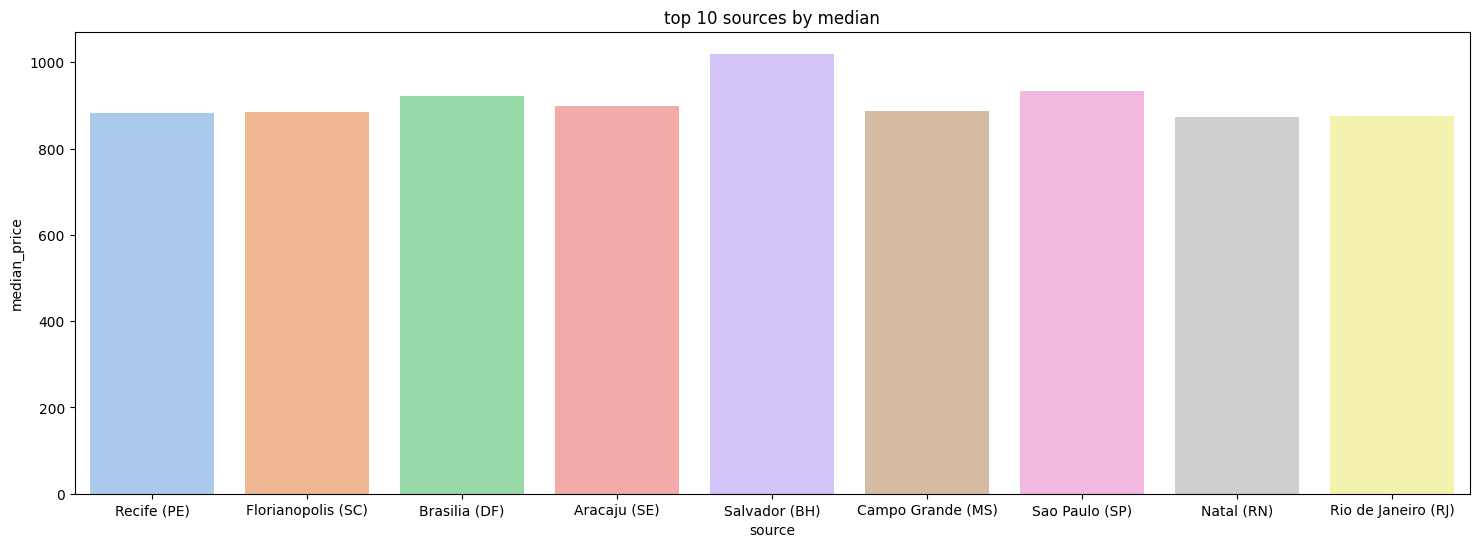

In [22]:
# chart 5 
median_price = data.groupby('source')['price'].median()
data['median_price'] = data['source'].map(median_price)
plot_bar_chart(data, "source", "median_price", "top 10 sources by median")

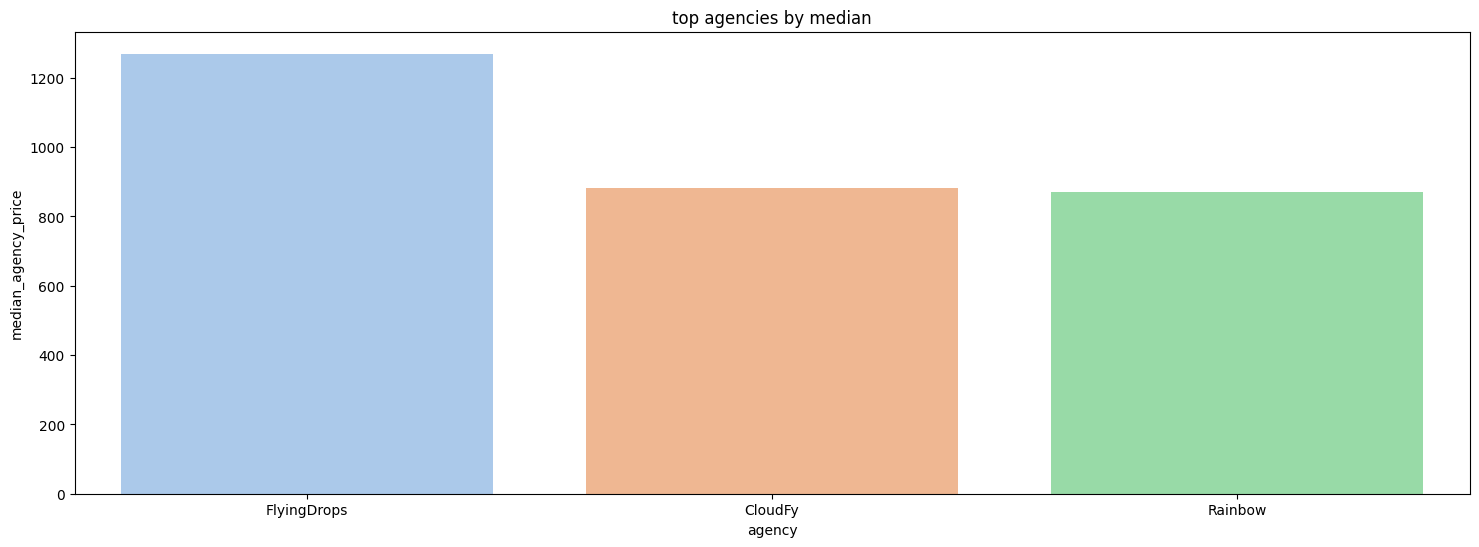

In [23]:
# chart 6
median_agency_price = data.groupby('agency')['price'].median()
data['median_agency_price'] = data['agency'].map(median_agency_price)
plot_bar_chart(data, "agency", "median_agency_price", "top agencies by median")

0         548.965770
1         548.965770
2         546.698296
3         546.698296
4         546.698296
             ...    
271883    546.698296
271884    546.698296
271885    546.698296
271886    546.698296
271887    546.698296
Name: mean_agency_distance, Length: 271888, dtype: float64

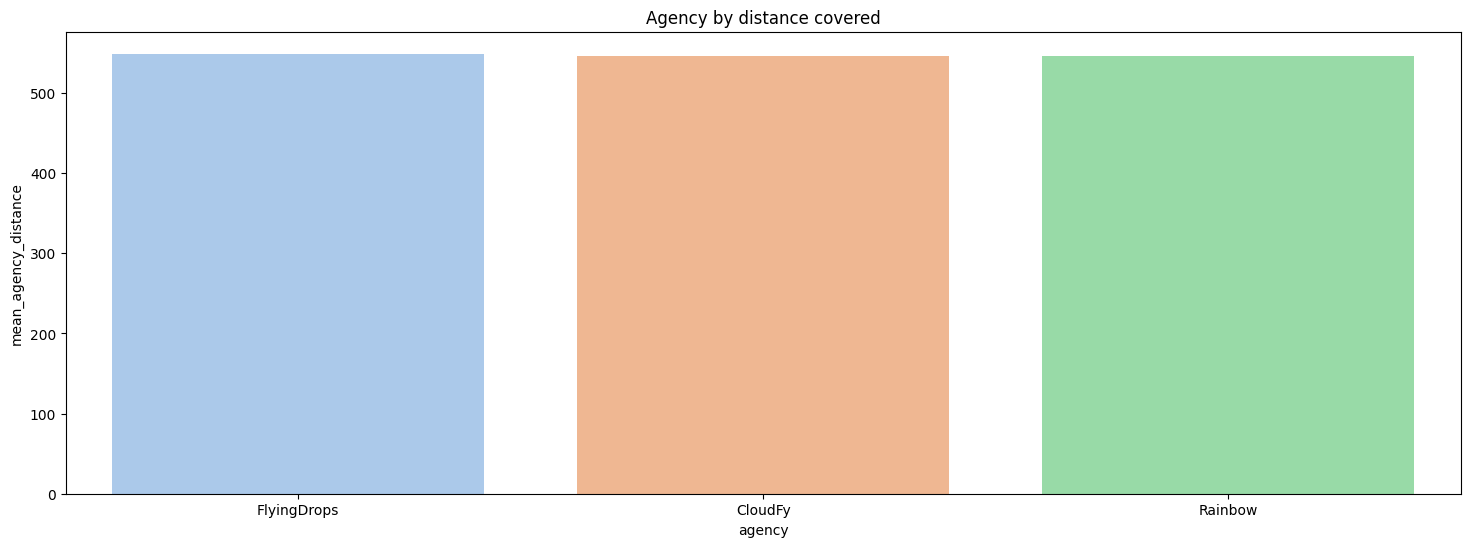

In [24]:
# chart 7
mean_agency_distance = data.groupby('agency')['distance'].mean()
data['mean_agency_distance'] = data['agency'].map(mean_agency_distance)
plot_bar_chart(data, "agency", "mean_agency_distance", "Agency by distance covered")
data['mean_agency_distance']

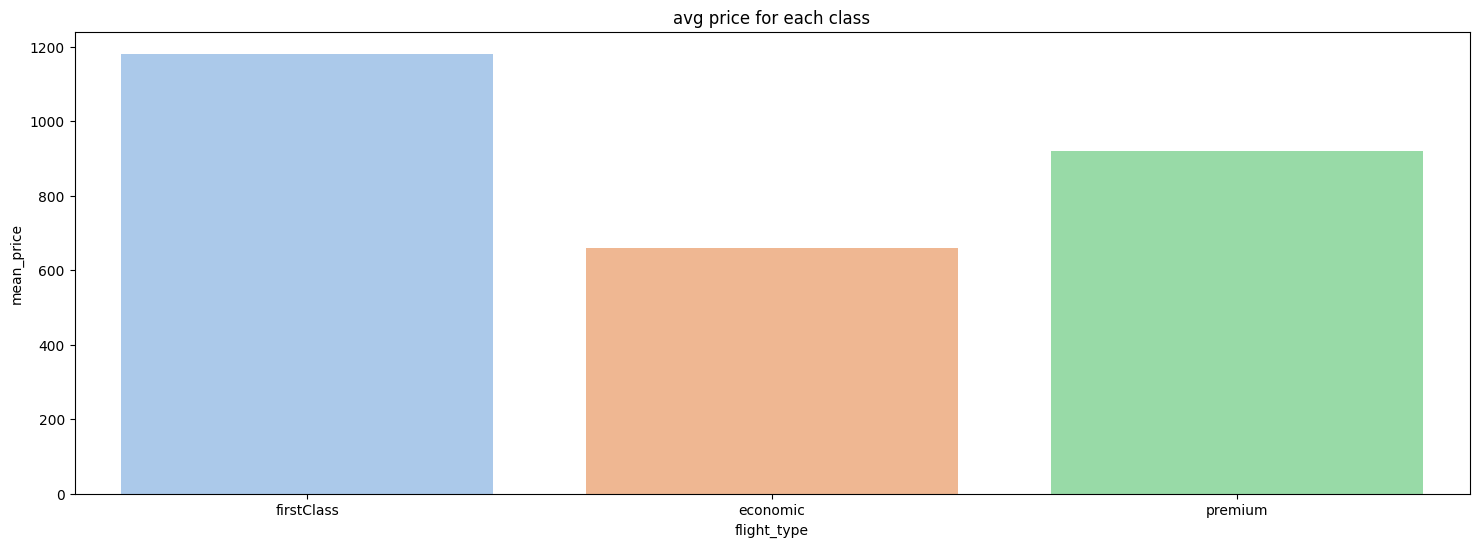

In [25]:
# chart 8
mean_price = data.groupby('flight_type')['price'].mean()
data['mean_price'] = data['flight_type'].map(mean_price)
plot_bar_chart(data, "flight_type", "mean_price", "avg price for each class")

In [26]:
cat_cols=data.select_dtypes(exclude='number')
num_cols=data.select_dtypes(include='number')
num_cols.columns

Index(['travel_code', 'user_code', 'price', 'time', 'distance', 'median_price',
       'median_agency_price', 'mean_agency_distance', 'mean_price'],
      dtype='object')

In [27]:
num_cols.drop(columns = ["median_price", "median_agency_price",
               "mean_agency_distance", "mean_price"
                ], axis =1, inplace = True)

In [28]:
"""
for i in num_cols:
  fig,ax = plt.subplots(figsize=(18,6))
  sns.regplot(x=data[i], y=data['price'], line_kws={'color':"black"})
  """

'\nfor i in num_cols:\n  fig,ax = plt.subplots(figsize=(18,6))\n  sns.regplot(x=data[i], y=data[\'price\'], line_kws={\'color\':"black"})\n  '

In [29]:
"""
for i in num_cols:
  fig = plt.figure(figsize=(18,6))
  ax=fig.gca()
  sns.boxplot(x=data[i])
  """

'\nfor i in num_cols:\n  fig = plt.figure(figsize=(18,6))\n  ax=fig.gca()\n  sns.boxplot(x=data[i])\n  '

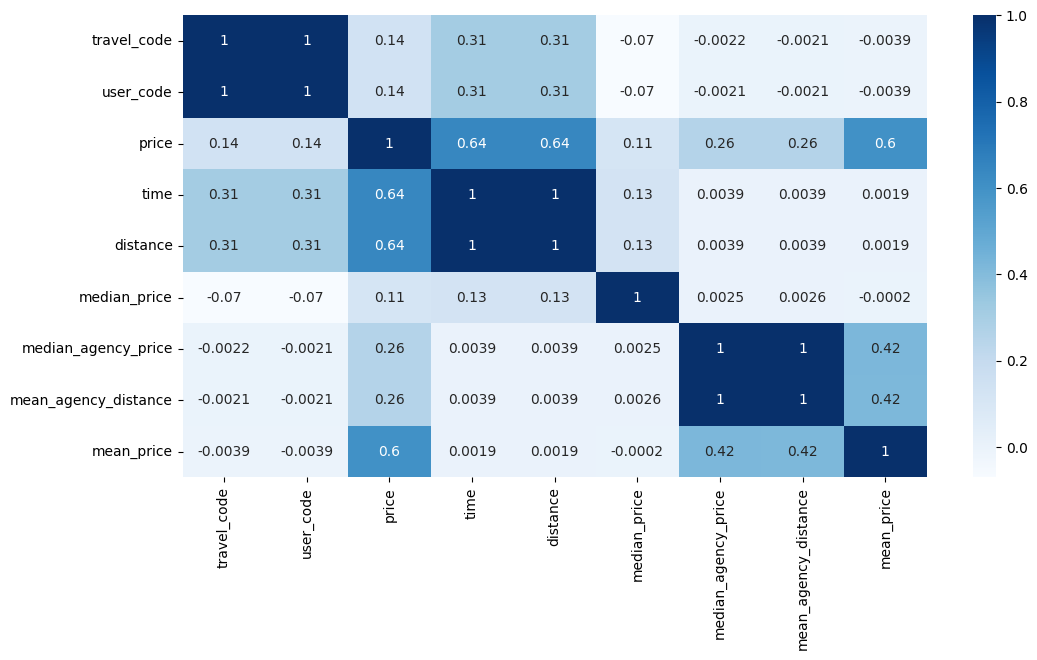

In [ ]:
# Correlation Heatmap (numeric columns only)
num_cols = data.select_dtypes(include=['number'])
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(num_cols.corr(), annot=True, cmap='Blues')
plt.show()

In [31]:
data.drop(columns=['median_price',
       'median_agency_price', 'mean_agency_distance', 'mean_price'], 
       axis = 1, inplace=True)

In [32]:
data.columns

Index(['travel_code', 'user_code', 'source', 'destination', 'flight_type',
       'price', 'time', 'distance', 'agency', 'date'],
      dtype='object')

In [33]:
data.drop(columns=['travel_code', 'user_code','date'], axis = 1, inplace = True)

In [34]:
data.columns

Index(['source', 'destination', 'flight_type', 'price', 'time', 'distance',
       'agency'],
      dtype='object')

## Feature Engieering

In [35]:
data["flight_type"].unique()

array(['firstClass', 'economic', 'premium'], dtype=object)

In [36]:
data = pd.get_dummies(data, columns=['flight_type','source', 'destination','agency'], drop_first=True)
data.columns

Index(['price', 'time', 'distance', 'flight_type_firstClass',
       'flight_type_premium', 'source_Brasilia (DF)',
       'source_Campo Grande (MS)', 'source_Florianopolis (SC)',
       'source_Natal (RN)', 'source_Recife (PE)', 'source_Rio de Janeiro (RJ)',
       'source_Salvador (BH)', 'source_Sao Paulo (SP)',
       'destination_Brasilia (DF)', 'destination_Campo Grande (MS)',
       'destination_Florianopolis (SC)', 'destination_Natal (RN)',
       'destination_Recife (PE)', 'destination_Rio de Janeiro (RJ)',
       'destination_Salvador (BH)', 'destination_Sao Paulo (SP)',
       'agency_FlyingDrops', 'agency_Rainbow'],
      dtype='object')

## Feature Manipulation and Selection

In [37]:
# checking skewness of columns
data.skew().sort_values()

distance                          -0.183944
time                              -0.179825
agency_Rainbow                     0.285210
flight_type_firstClass             0.290277
price                              0.313578
flight_type_premium                0.942283
source_Florianopolis (SC)          1.418002
destination_Florianopolis (SC)     1.418002
agency_FlyingDrops                 2.044826
source_Campo Grande (MS)           2.229608
destination_Campo Grande (MS)      2.229608
source_Brasilia (DF)               2.441573
destination_Brasilia (DF)          2.441573
source_Recife (PE)                 2.458971
destination_Recife (PE)            2.458971
source_Natal (RN)                  2.919212
destination_Natal (RN)             2.919212
destination_Sao Paulo (SP)         2.933214
source_Sao Paulo (SP)              2.933214
destination_Salvador (BH)          3.600478
source_Salvador (BH)               3.600478
source_Rio de Janeiro (RJ)         3.638055
destination_Rio de Janeiro (RJ) 

We can confirm that skewness is not there in data

In [38]:
data.drop(columns = ["distance"], axis = 1, inplace = True)

## Data Splitting 

In [39]:
x = data.drop(['price'], axis = 1)
y = data['price']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 8888)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(190321, 21)
(190321,)
(81567, 21)
(81567,)


# ML Models

In [41]:
def get_time(name, t):
  print("Training time in seconds:-", t)
  metrics_values = {'Name': name, "Training time(sec)":round(t,4)}
  global time_df
  time_df=pd.DataFrame(metrics_values, index=[1])


def get_metrics(x, y, z):
  mse = mean_squared_error(x, y)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(x, y)
  r2 = r2_score(x, y)
  print("The Mean Squared Error(MSE) is:-",mse)
  print("The Root Mean Squared Error(RMSE) is:-",rmse)
  print("The Mean Absolute Error(MAE) is:-",mae)
  print("The R2 Score is:-",r2)
  metrics_values = {'Name': z, 'MSE':round(mse,3), 'RMSE':round(rmse,3), 'MAE':round(mae,3), "R2 Score":round(r2, 5)}
  global results_df
  results_df=pd.DataFrame(metrics_values, index=[1])


In [42]:
import mlflow
import time

In [ ]:
# Linear Regression (baseline)
import time
from sklearn.linear_model import LinearRegression

lin_t0 = time.time()
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_preds = lin_reg.predict(x_test)
lin_time = time.time() - lin_t0

lin_mse = mean_squared_error(y_test, lin_preds)
lin_rmse = lin_mse ** 0.5
lin_mae = mean_absolute_error(y_test, lin_preds)
lin_r2 = r2_score(y_test, lin_preds)
print({'rmse': lin_rmse, 'mae': lin_mae, 'r2': lin_r2, 'training_time_sec': lin_time})

with mlflow.start_run(run_name='LinearRegression', nested=True):
    mlflow.log_param('model', 'LinearRegression')
    mlflow.log_metric('rmse', lin_rmse)
    mlflow.log_metric('mae', lin_mae)
    mlflow.log_metric('r2', lin_r2)
    mlflow.log_metric('training_time_sec', lin_time)
    mlflow.sklearn.log_model(lin_reg, 'model')

{'rmse': 102.61330587181092, 'mae': 80.78608335860055, 'r2': 0.9196067413676132, 'training_time_sec': 0.11729955673217773}


2025/12/19 18:05:02 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [44]:
# model 2 lasso regression
t0 = time.time()
lasso_reg=Lasso(alpha = 0.1, max_iter = 10000)
lasso_reg.fit(x_train, y_train)
coef = lasso_reg.coef_
print(pd.DataFrame(coef, x.columns, columns=[1]))
y_pred = lasso_reg.predict(x_test)
y_training_pred = lasso_reg.predict(x_train)
time_in_sec = time.time() - t0
get_time("Lasso Regression", time_in_sec)
times = times = pd.concat([time_df], ignore_index = True)

                                          1
time                             561.440658
flight_type_firstClass           517.863097
flight_type_premium              258.242223
source_Brasilia (DF)             223.127626
source_Campo Grande (MS)         130.257292
source_Florianopolis (SC)       -168.040129
source_Natal (RN)                146.404870
source_Recife (PE)                 7.823055
source_Rio de Janeiro (RJ)        -0.000000
source_Salvador (BH)            -155.563250
source_Sao Paulo (SP)            279.940840
destination_Brasilia (DF)        -45.653804
destination_Campo Grande (MS)    -53.068559
destination_Florianopolis (SC)   -50.709524
destination_Natal (RN)            -0.682361
destination_Recife (PE)          -46.455598
destination_Rio de Janeiro (RJ) -137.063755
destination_Salvador (BH)        -40.075645
destination_Sao Paulo (SP)      -102.727282
agency_FlyingDrops                 4.173128
agency_Rainbow                     0.812471
Training time in seconds:- 0.244

The Mean Squared Error(MSE) is:- 10536.321304199808
The Root Mean Squared Error(RMSE) is:- 102.64658447410613
The Mean Absolute Error(MAE) is:- 80.6900954621541
The R2 Score is:- 0.9195545881096112


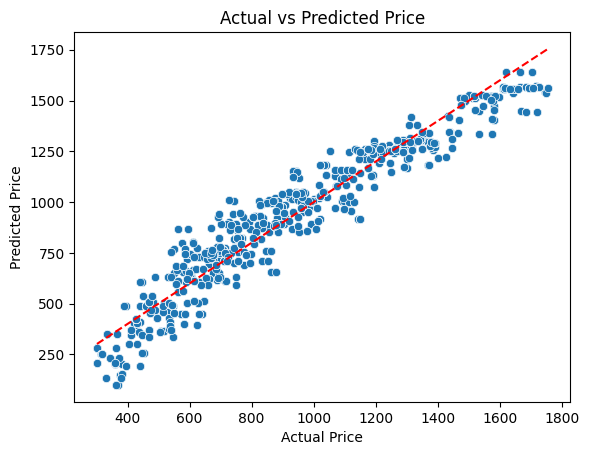

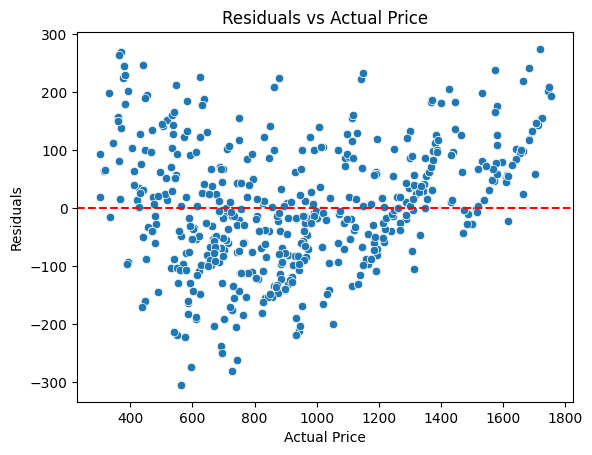

In [45]:
get_metrics(y_test, y_pred, 'Lasso Regression')
test_df = test_df = pd.concat([results_df], ignore_index= True)
residuals = y_test - y_pred
# Actual vs Predicted
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Residual Plot
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual Price")
plt.show()

In [46]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.linear_model import SGDRegressor

lasso = SGDRegressor(
    penalty='l1',
    alpha=0.1,
    max_iter=1000,
    tol=1e-3,
    random_state=42
)

lasso_cv = HalvingGridSearchCV(
    estimator=SGDRegressor(penalty='l1', max_iter=1000),
    param_grid={'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]},
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)
lasso_cv.fit(x_train, y_train)
# Step 3: Create a refined alpha range around best_alpha
best_alpha = lasso_cv.best_params_['alpha']

# Create range +- one order of magnitude around best_alpha but finer grid
lower = best_alpha / 10
upper = best_alpha * 10

refined_alphas = np.linspace(lower, upper, 10)
refined_alphas = refined_alphas[refined_alphas > 0]  # Ensure positive

print("Refined alpha range:", refined_alphas)

# Step 4: Run HalvingGridSearchCV again on refined range
lassocv_final = HalvingGridSearchCV(
    estimator=SGDRegressor(penalty='l1', max_iter=1000, tol=1e-3, random_state=42),
    param_grid={'alpha': refined_alphas},
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)
lassocv_final.fit(x_train, y_train)

print("Refined best alpha:", lassocv_final.best_params_['alpha'])
print("Refined best score:", lassocv_final.best_score_)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 21146
max_resources_: 190321
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 20
n_resources: 21146
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 1
n_candidates: 7
n_resources: 63438
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 2
n_candidates: 3
n_resources: 190314
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Refined alpha range: [1.0e-09 1.2e-08 2.3e-08 3.4e-08 4.5e-08 5.6e-08 6.7e-08 7.8e-08 8.9e-08
 1.0e-07]
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 21146
max_resources_: 190321
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 10
n_resources: 21146
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 4
n_resources: 63438
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 2

In [ ]:
print("Best Score:-",lassocv_final.best_score_)
print("Best parameters:-",lassocv_final.best_params_)

Best Score:- -10633.76165898596
Best parameters:- {'alpha': 1.2e-08}


In [48]:
lasso_reg = Lasso(alpha=lassocv_final.best_params_['alpha'])
lasso_reg.fit(x_train, y_train)
y_pred = lasso_reg.predict(x_test)
y_training_pred = lasso_reg.predict(x_train)
time_in_sec = time.time() - t0

get_metrics(y_test, y_pred, "Lasso Regression(GridSearchCV)")
test_df = test_df = pd.concat([results_df], ignore_index = True)

The Mean Squared Error(MSE) is:- 10529.490541822302
The Root Mean Squared Error(RMSE) is:- 102.61330587122852
The Mean Absolute Error(MAE) is:- 80.78608334368663
The R2 Score is:- 0.9196067413685257


In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

# Assuming x_train, y_train, x_test are ready

# Helper function (assumed you have)
def get_time(name, seconds):
    print(f"{name} took {seconds:.2f} seconds")

# --- Model 1: Ridge regression (basic fit) ---
t0 = time.time()
ridge_reg = Ridge(alpha=0.1, max_iter=10000)
ridge_reg.fit(x_train, y_train)
coef = ridge_reg.coef_
print(pd.DataFrame(coef, x_train.columns, columns=['Coefficient']))
y_pred = ridge_reg.predict(x_test)
y_training_pred = ridge_reg.predict(x_train)
time_in_sec = time.time() - t0
get_time("Ridge Regression", time_in_sec)
# Append time info to times DataFrame if you have it:
times = times = pd.concat([time_df], ignore_index=True)

                                 Coefficient
time                              563.455901
flight_type_firstClass            518.544951
flight_type_premium               259.297053
source_Brasilia (DF)              225.864207
source_Campo Grande (MS)          132.641996
source_Florianopolis (SC)        -168.065729
source_Natal (RN)                 149.209580
source_Recife (PE)                  9.880554
source_Rio de Janeiro (RJ)          0.540822
source_Salvador (BH)             -157.300568
source_Sao Paulo (SP)             283.040454
destination_Brasilia (DF)         -51.258544
destination_Campo Grande (MS)     -58.878058
destination_Florianopolis (SC)    -57.635114
destination_Natal (RN)             -6.638339
destination_Recife (PE)           -52.719076
destination_Rio de Janeiro (RJ)  -144.150751
destination_Salvador (BH)         -48.266003
destination_Sao Paulo (SP)       -108.417408
agency_FlyingDrops                  5.218929
agency_Rainbow                      1.505583
Ridge Regr

The Mean Squared Error(MSE) is:- 10529.490393538661
The Root Mean Squared Error(RMSE) is:- 102.61330514869239
The Mean Absolute Error(MAE) is:- 80.78605388041461
The R2 Score is:- 0.9196067425006798


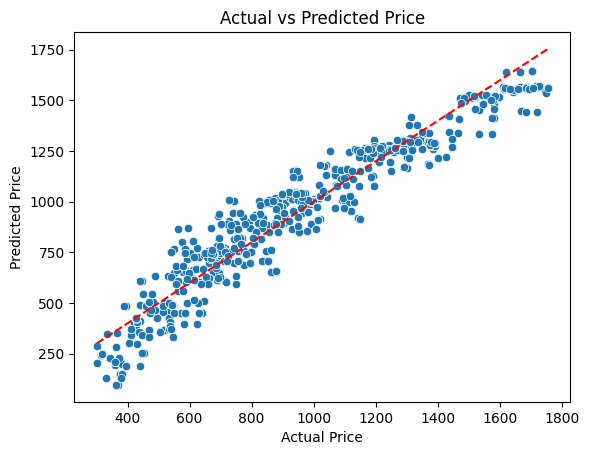

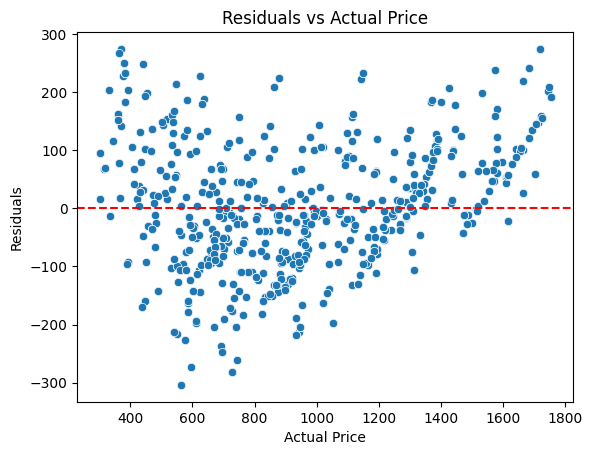

In [50]:
get_metrics(y_test, y_pred, 'Lasso Regression')
test_df = test_df = pd.concat([results_df], ignore_index= True)
residuals = y_test - y_pred
# Actual vs Predicted
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Residual Plot
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual Price")
plt.show()

In [ ]:
# --- Model 2: Ridge regression with SGDRegressor + HalvingGridSearchCV ---
sgd_ridge = SGDRegressor(
    penalty='l2',
    alpha=0.1,
    max_iter=1000,
    tol=1e-3,
    random_state=42
)

param_grid = {
    'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]
}

ridge_cv = HalvingGridSearchCV(
    estimator=SGDRegressor(penalty='l2', max_iter=1000, tol=1e-3, random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

ridge_cv.fit(x_train, y_train)

# Refine alpha range around best alpha found
best_alpha = ridge_cv.best_params_['alpha']
lower = best_alpha / 10
upper = best_alpha * 10
refined_alphas = np.linspace(lower, upper, 10)
refined_alphas = refined_alphas[refined_alphas > 0]

print("Refined alpha range:", refined_alphas)

ridge_cv_final = HalvingGridSearchCV(
    estimator=SGDRegressor(penalty='l2', max_iter=1000, tol=1e-3, random_state=42),
    param_grid={'alpha': refined_alphas},
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

ridge_cv_final.fit(x_train, y_train)

print("Refined best alpha:", ridge_cv_final.best_params_['alpha'])
print("Refined best score:", ridge_cv_final.best_score_)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 21146
max_resources_: 190321
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 20
n_resources: 21146
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 1
n_candidates: 7
n_resources: 63438
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 2
n_candidates: 3
n_resources: 190314
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Refined alpha range: [1.0e-06 1.2e-05 2.3e-05 3.4e-05 4.5e-05 5.6e-05 6.7e-05 7.8e-05 8.9e-05
 1.0e-04]
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 21146
max_resources_: 190321
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 10
n_resources: 21146
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 4
n_resources: 63438
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 2

In [52]:
ridge_reg = Ridge(alpha=ridge_cv_final.best_params_['alpha'], max_iter=10000)
ridge_reg.fit(x_train, y_train)
y_pred = ridge_reg.predict(x_test)
y_training_pred = ridge_reg.predict(x_train)
time_in_sec = time.time() - t0
get_metrics(y_test, y_pred, "Ridge Regression (GridSearchCV)")
test_df = test_df = pd.concat([results_df], ignore_index=True)

The Mean Squared Error(MSE) is:- 10529.490541906669
The Root Mean Squared Error(RMSE) is:- 102.61330587163961
The Mean Absolute Error(MAE) is:- 80.78608335182494
The R2 Score is:- 0.9196067413678816


In [ ]:
#elastic net
import time
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.linear_model import SGDRegressor

# Assume x_train, y_train, x_test, y_test are ready and scaled if needed

# Helper function (assumed you have)
def get_time(name, seconds):
    print(f"{name} took {seconds:.2f} seconds")

# --- Model 1: Elastic Net (basic fit) ---
t0 = time.time()
elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, random_state=42)
elastic_net_reg.fit(x_train, y_train)
coef = elastic_net_reg.coef_
print(pd.DataFrame(coef, x_train.columns, columns=['Coefficient']))
y_pred = elastic_net_reg.predict(x_test)
y_training_pred = elastic_net_reg.predict(x_train)
time_in_sec = time.time() - t0
get_time("Elastic Net Regression", time_in_sec)
# times = times = pd.concat([time_df, ignore_index=True)  # If you have timing dataframe

# Elastic Net via SGDRegressor with penalty='elasticnet'

# Initial parameter grid for alpha and l1_ratio
param_grid = {
    'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

elastic_sgd = SGDRegressor(
    penalty='elasticnet',
    max_iter=1000,
    tol=1e-3,
    random_state=42
)

elastic_cv = HalvingGridSearchCV(
    estimator=elastic_sgd,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

elastic_cv.fit(x_train, y_train)

print("Initial best params:", elastic_cv.best_params_)
print("Initial best score:", elastic_cv.best_score_)

best_alpha = elastic_cv.best_params_['alpha']
best_l1_ratio = elastic_cv.best_params_['l1_ratio']

# Refine alpha around best_alpha
alpha_lower = best_alpha / 10
alpha_upper = best_alpha * 10
refined_alphas = np.linspace(alpha_lower, alpha_upper, 10)
refined_alphas = refined_alphas[refined_alphas > 0]

# Refine l1_ratio around best_l1_ratio Ã‚Â± 0.2, clipped between 0 and 1
l1_lower = max(0, best_l1_ratio - 0.2)
l1_upper = min(1, best_l1_ratio + 0.2)
refined_l1_ratios = np.linspace(l1_lower, l1_upper, 5)

print("Refined alpha range:", refined_alphas)
print("Refined l1_ratio range:", refined_l1_ratios)

elastic_cv_final = HalvingGridSearchCV(
    estimator=elastic_sgd,
    param_grid={'alpha': refined_alphas, 'l1_ratio': refined_l1_ratios},
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

elastic_cv_final.fit(x_train, y_train)

print("Refined best params:", elastic_cv_final.best_params_)
print("Refined best score:", elastic_cv_final.best_score_)

from sklearn.linear_model import ElasticNet

t0 = time.time()

elastic_net_final = ElasticNet(
    alpha=elastic_cv_final.best_params_['alpha'],
    l1_ratio=elastic_cv_final.best_params_['l1_ratio'],
    max_iter=10000,
    random_state=42
)

elastic_net_final.fit(x_train, y_train)

y_pred = elastic_net_final.predict(x_test)
y_training_pred = elastic_net_final.predict(x_train)

time_in_sec = time.time() - t0

get_metrics(y_test, y_pred, "Elastic Net Regression (GridSearchCV)")

test_df = test_df = pd.concat([results_df], ignore_index=True)

                                 Coefficient
time                              382.614570
flight_type_firstClass            371.425020
flight_type_premium               143.554571
source_Brasilia (DF)               88.947712
source_Campo Grande (MS)           43.656183
source_Florianopolis (SC)        -105.255371
source_Natal (RN)                  35.781424
source_Recife (PE)                -20.196693
source_Rio de Janeiro (RJ)        -21.385637
source_Salvador (BH)              -51.695483
source_Sao Paulo (SP)             107.412292
destination_Brasilia (DF)         -52.833511
destination_Campo Grande (MS)     -38.829045
destination_Florianopolis (SC)     54.118263
destination_Natal (RN)            -15.289099
destination_Recife (PE)            -9.023607
destination_Rio de Janeiro (RJ)   -60.682114
destination_Salvador (BH)          48.914077
destination_Sao Paulo (SP)        -97.213983
agency_FlyingDrops                 45.032977
agency_Rainbow                     -2.824526
Elastic Ne

In [ ]:
# Random Forest (baseline)
t0 = time.time()
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_time = time.time() - t0
print(f"RF baseline time: {rf_time:.2f}s")

mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)
print({"mse": mse, "rmse": rmse, "mae": mae, "r2": r2})

get_time("Random Forest Regression", rf_time)
times = pd.concat([times, time_df], ignore_index=True) if 'times' in locals() else time_df.copy()
get_metrics(y_test, rf_pred, "Random Forest Regression")
test_df = pd.concat([test_df, results_df], ignore_index=True) if 'test_df' in locals() else results_df.copy()

# Feature importances
importances = pd.Series(rf.feature_importances_, index=x_train.columns)
print(importances.sort_values(ascending=False))

# Log/save (tolerant)
try:
    with mlflow.start_run(run_name="RandomForest_Basic"):
        mlflow.log_param("model_type", "RandomForest")
        mlflow.log_param("n_estimators", 100)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("training_time", rf_time)
        mlflow.sklearn.log_model(rf, "model")
except Exception as e:
    print("Skipping mlflow log:", e)
    import joblib

RF baseline time: 1.89s
{'mse': 1.983472132144581e-23, 'rmse': 4.4536189016849895e-12, 'mae': 3.2103349937429116e-12, 'r2': 1.0}
Random Forest Regression took 1.89 seconds
The Mean Squared Error(MSE) is:- 1.983472132144581e-23
The Root Mean Squared Error(RMSE) is:- 4.4536189016849895e-12
The Mean Absolute Error(MAE) is:- 3.2103349937429116e-12
The R2 Score is:- 1.0
time                               0.485879
flight_type_firstClass             0.296393
flight_type_premium                0.076533
source_Florianopolis (SC)          0.055382
source_Sao Paulo (SP)              0.015710
source_Brasilia (DF)               0.014406
destination_Florianopolis (SC)     0.009755
destination_Natal (RN)             0.008027
destination_Sao Paulo (SP)         0.005980
destination_Salvador (BH)          0.005821
source_Campo Grande (MS)           0.003675
destination_Brasilia (DF)          0.003591
source_Salvador (BH)               0.003459
agency_Rainbow                     0.003450
destination_Camp

In [55]:
mlflow.sklearn.log_model(rf, 'model')

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf_estimator = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_cv = HalvingGridSearchCV(
    estimator=rf_estimator,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=2,
)
rf_cv.fit(x_train, y_train)
print("Best params:", rf_cv.best_params_)
print("Best score:", rf_cv.best_score_)

t0 = time.time()
rf_final = RandomForestRegressor(**rf_cv.best_params_, random_state=42, n_jobs=-1)
rf_final.fit(x_train, y_train)
rf_final_pred = rf_final.predict(x_test)
rf_final_time = time.time() - t0
print(f"rf_final time: {rf_final_time:.2f}s")

mse = mean_squared_error(y_test, rf_final_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rf_final_pred)
r2 = r2_score(y_test, rf_final_pred)
print({"mse": mse, "rmse": rmse, "mae": mae, "r2": r2})

get_time("Random Forest Regression (Tuned)", rf_final_time)
times = pd.concat([times, time_df], ignore_index=True) if 'times' in locals() else time_df.copy()
get_metrics(y_test, rf_final_pred, "Random Forest Regression (Tuned)")
test_df = pd.concat([test_df, results_df], ignore_index=True) if 'test_df' in locals() else results_df.copy()

try:
    with mlflow.start_run(run_name="RandomForest_Tuned"):
        mlflow.log_param("model_type", "RandomForest_Tuned")
        mlflow.log_params(rf_cv.best_params_)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("training_time", rf_final_time)
        mlflow.sklearn.log_model(rf_final, "model")
except Exception as e:
    print("Skipping mlflow log:", e)
    import joblib

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 2349
max_resources_: 190321
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 108
n_resources: 2349
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 1
n_candidates: 36
n_resources: 7047
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 2
n_candidates: 12
n_resources: 21141
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 3
n_candidates: 4
n_resources: 63423
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 4
n_candidates: 2
n_resources: 190269
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: -1.2417142959585129e-23
rf_final time: 0.95s
{'mse': 1.737464042774009e-23, 'rmse': 4.168289868488046e-12, 'mae': 3.0043677608211335e-12, 'r2': 1.0}
Random For

Text(0.5, 0, 'Relative Importance')

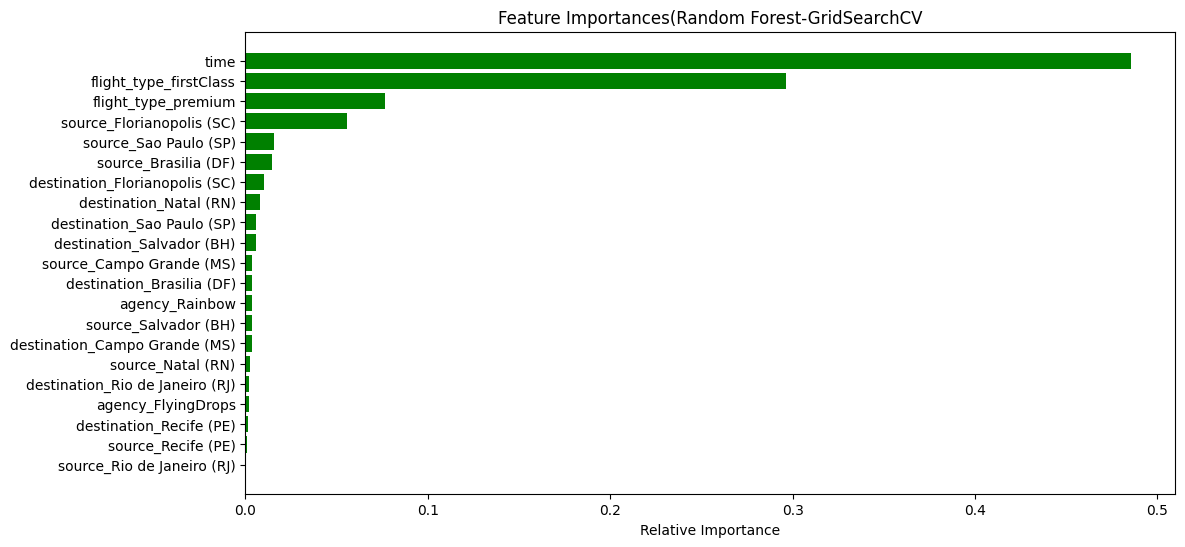

In [57]:
importances = rf_final.feature_importances_
imp_var = x.columns
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_var[indices])
plt.xlabel('Relative Importance')

In [58]:
# Gradient Boosting Regressor (baseline)
t0 = time.time()
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)
gbr_preds = gbr.predict(x_test)
gbr_time = time.time() - t0
print(f"GBR time: {gbr_time:.2f}s")

mse = mean_squared_error(y_test, gbr_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, gbr_preds)
r2 = r2_score(y_test, gbr_preds)
print({"mse": mse, "rmse": rmse, "mae": mae, "r2": r2})

# record time/metrics tables
get_time("Gradient Boosting", gbr_time)
times = pd.concat([times, time_df], ignore_index=True) if "times" in locals() else time_df.copy()
get_metrics(y_test, gbr_preds, "Gradient Boosting")
test_df = pd.concat([test_df, results_df], ignore_index=True) if "test_df" in locals() else results_df.copy()

# log/save
try:
    with mlflow.start_run(run_name="GradientBoosting_Basic"):
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("training_time", gbr_time)
        mlflow.sklearn.log_model(gbr, "model")
except Exception as e:
    print("Skipping mlflow log:", e)
    import joblib

# Feature importances (GBR has feature_importances_)
importances = pd.Series(gbr.feature_importances_, index=x_train.columns)
print(importances.sort_values(ascending=False))

GBR time: 7.21s
{'mse': 1887.51540767131, 'rmse': 43.4455453144659, 'mae': 34.481558255071356, 'r2': 0.9855887126032262}
Gradient Boosting took 7.21 seconds
The Mean Squared Error(MSE) is:- 1887.51540767131
The Root Mean Squared Error(RMSE) is:- 43.4455453144659
The Mean Absolute Error(MAE) is:- 34.481558255071356
The R2 Score is:- 0.9855887126032262
Skipping mlflow log: Run with UUID cf5a9c5b7da147e7a24538b7e07e98be is already active. To start a new run, first end the current run with mlflow.end_run(). To start a nested run, call start_run with nested=True
time                               0.469080
flight_type_firstClass             0.300570
flight_type_premium                0.079880
source_Florianopolis (SC)          0.029572
destination_Florianopolis (SC)     0.028481
source_Sao Paulo (SP)              0.026700
destination_Sao Paulo (SP)         0.020327
source_Brasilia (DF)               0.013757
destination_Brasilia (DF)          0.013533
destination_Salvador (BH)          0.004

In [59]:
mlflow.sklearn.log_model(gbr, 'model')

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [2, 3, 4],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.8, 1.0],
}

gbr_estimator = GradientBoostingRegressor(random_state=42)
gbr_cv = HalvingGridSearchCV(
    estimator=gbr_estimator,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=2,
)

gbr_cv.fit(x_train, y_train)
print("GBR best params:", gbr_cv.best_params_)
print("GBR best score:", gbr_cv.best_score_)

t0 = time.time()
gbr_final = GradientBoostingRegressor(**gbr_cv.best_params_, random_state=42)
gbr_final.fit(x_train, y_train)
gbr_final_preds = gbr_final.predict(x_test)
gbr_final_time = time.time() - t0
print(f"gbr_final time: {gbr_final_time:.2f}s")

mse = mean_squared_error(y_test, gbr_final_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, gbr_final_preds)
r2 = r2_score(y_test, gbr_final_preds)
print({"mse": mse, "rmse": rmse, "mae": mae, "r2": r2})

get_time("Gradient Boosting (Tuned)", gbr_final_time)
times = pd.concat([times, time_df], ignore_index=True) if "times" in locals() else time_df.copy()
get_metrics(y_test, gbr_final_preds, "Gradient Boosting (Tuned)")

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 7048
max_resources_: 190321
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 54
n_resources: 7048
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 1
n_candidates: 18
n_resources: 21144
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 2
n_candidates: 6
n_resources: 63432
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 2
n_resources: 190296
Fitting 5 folds for each of 2 candidates, totalling 10 fits
GBR best params: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
GBR best score: -191.0146278144862
gbr_final time: 23.59s
{'mse': 194.4077922177209, 'rmse': 13.943019479930483, 'mae': 10.388960726862509, 'r2': 0.9985156854590774}
Gradient Boosting (Tuned) took 23.59 seconds
The Mean Squared Error(MSE) is:- 194.4077922177209
The Root Mean Squared Error(RMSE

Text(0.5, 0, 'Relative Importance')

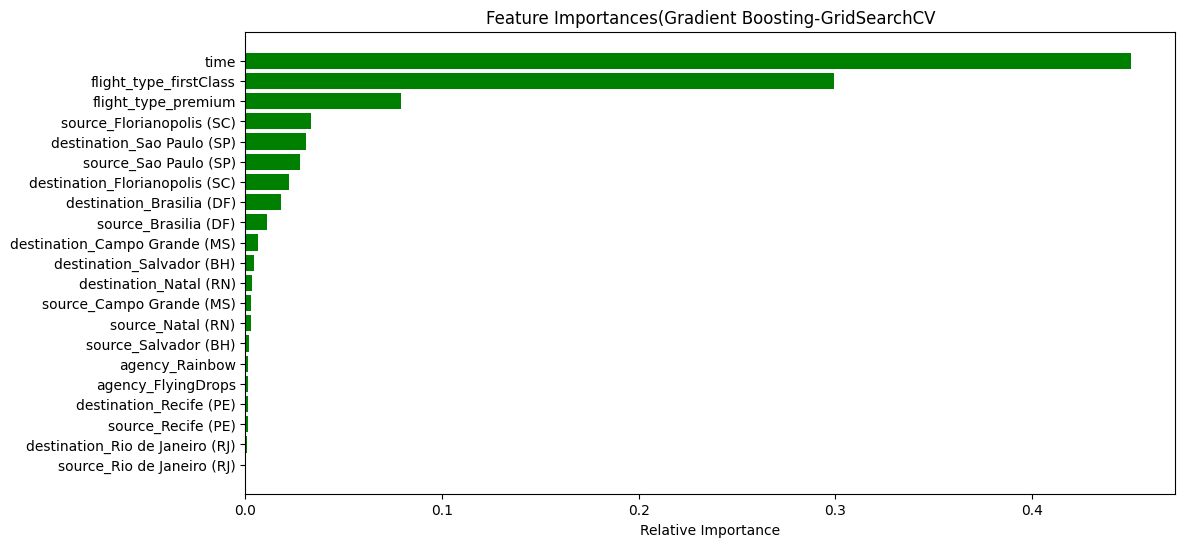

In [61]:
importances = gbr_final.feature_importances_
imp_var = x.columns
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_var[indices])
plt.xlabel('Relative Importance')

In [ ]:
from pathlib import Path
import os

CWD = Path.cwd().resolve()
ROOT = CWD.parent if CWD.name == "notebooks" else CWD
DATA_DIR = ROOT / "data"

In [ ]:
import mlflow
if mlflow.active_run():
    mlflow.end_run()

## Gender classification (using TF-IDF + Logistic Regression)

In [ ]:
# Gender classification
import pandas as pd, numpy as np, joblib
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import mlflow, mlflow.sklearn

ROOT = Path.cwd().resolve()
if ROOT.name == 'notebooks':
    ROOT = ROOT.parent
candidates = [ROOT / 'data' / 'users.csv', ROOT / 'data' / 'sample' / 'users.csv']
users_path = next((p for p in candidates if p.exists()), None)
if users_path is None:
    raise FileNotFoundError('Could not find users.csv in data/ or data/sample/')

users_df = pd.read_csv(users_path)
users_df = users_df[users_df['gender'].isin(['male', 'female'])].copy()
users_df['text'] = users_df['name'].fillna('') + ' ' + users_df['company'].fillna('')
users_df['age'] = users_df['age'].fillna(users_df['age'].median())

X = users_df[['text', 'age']]
y = users_df['gender']

text_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(
        ngram_range=(1,2),
        min_df=2,
        max_features=20000,
        stop_words='english'
    ))
])
num_pipe = Pipeline([
    ('scaler', StandardScaler())
])

preprocess = ColumnTransformer([
    ('text', text_pipe, 'text'),
    ('num', num_pipe, ['age'])
], remainder='drop')

clf = LogisticRegression(max_iter=500, class_weight='balanced', n_jobs=-1)
model = Pipeline([
    ('prep', preprocess),
    ('clf', clf)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

with mlflow.start_run(run_name='gender_tfidf_logreg'):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label='female')
    cm = confusion_matrix(y_test, y_pred, labels=['female','male'])
    print({'accuracy': acc, 'precision_f': prec, 'recall_f': rec, 'f1_f': f1})
    print('Confusion matrix:', cm)
    print(classification_report(y_test, y_pred))

    mlflow.log_param('model', 'logistic_regression')
    mlflow.log_param('tfidf_max_features', 20000)
    mlflow.log_param('tfidf_ngram', '1-2')
    mlflow.log_metric('accuracy', acc)
    mlflow.log_metric('precision_f', prec)
    mlflow.log_metric('recall_f', rec)
    mlflow.log_metric('f1_f', f1)
    mlflow.sklearn.log_model(model, 'model')

# Save artifact for API/streamlit
out_path = ROOT / 'models' / 'trained' / 'gender_model.pkl'
out_path.parent.mkdir(parents=True, exist_ok=True)
joblib.dump(model, out_path)
print(f'Saved gender model to {out_path}')

{'accuracy': 0.7166666666666667, 'precision_f': 0.6857142857142857, 'recall_f': 0.8, 'f1_f': 0.7384615384615385}
Confusion matrix: [[72 18]
 [33 57]]
              precision    recall  f1-score   support

      female       0.69      0.80      0.74        90
        male       0.76      0.63      0.69        90

    accuracy                           0.72       180
   macro avg       0.72      0.72      0.71       180
weighted avg       0.72      0.72      0.71       180

Saved gender model to C:\Users\archi\New folder\abmsm_beginner\models\trained\gender_model.pkl


## Hotel recommender (lightweight TF-IDF + cosine via k-NN)

In [ ]:
# Lightweight hotel recommender: TF-IDF + cosine via k-NN
import pandas as pd, joblib
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

ROOT = Path.cwd().resolve()
if ROOT.name == 'notebooks':
    ROOT = ROOT.parent
hotels_path = ROOT / 'data' / 'hotels.csv'
if not hotels_path.exists():
    raise FileNotFoundError('Could not find hotels.csv in data/')

hotels_df = pd.read_csv(hotels_path)
hotels_df = hotels_df.drop_duplicates(subset=['name','place'], keep='first')
for col in ['name','place','date']:
    if col not in hotels_df.columns:
        hotels_df[col] = ''
hotels_df['text'] = hotels_df[['name','place','date']].fillna('').astype(str).agg(' '.join, axis=1)

vec = TfidfVectorizer(stop_words='english', max_features=5000, min_df=3, ngram_range=(1,1))
tfidf = vec.fit_transform(hotels_df['text'])

knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(tfidf)

rec_path = ROOT / 'models' / 'trained' / 'recommender.pkl'
rec_path.parent.mkdir(parents=True, exist_ok=True)
joblib.dump({'vectorizer': vec, 'tfidf': tfidf, 'knn': knn, 'hotels': hotels_df}, rec_path)
print(f'Saved lightweight recommender to {rec_path}')

Saved lightweight recommender to C:\Users\archi\New folder\abmsm_beginner\models\trained\recommender.pkl


In [ ]:
# Train and save price model with preprocessing (for API)
import pandas as pd, numpy as np, joblib
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Resolve project root and data path
ROOT = Path.cwd().resolve()
if ROOT.name == 'notebooks':
    ROOT = ROOT.parent

flights_path = ROOT / 'data' / 'flights.csv'
if not flights_path.exists():
    raise FileNotFoundError('Could not find flights.csv in data/')

# Load and prep data
flights = pd.read_csv(flights_path).rename(columns={'from':'source','to':'destination','flightType':'flight_type'})
flights = flights.dropna(subset=['price'])

base_features = ['source','destination','flight_type','time','distance','agency','date']

def add_features(df):
    out = df.copy()
    out['date_parsed'] = pd.to_datetime(out['date'], errors='coerce')
    out['month'] = out['date_parsed'].dt.month.fillna(0).astype(int)
    out['dayofweek'] = out['date_parsed'].dt.dayofweek.fillna(0).astype(int)
    out['speed'] = out['distance'] / out['time'].replace(0, np.nan)
    out['speed'] = out['speed'].fillna(out['speed'].median())
    return out.drop(columns=['date_parsed'])

cat_cols = ['source','destination','flight_type','agency','month','dayofweek']
num_cols = ['time','distance','speed']

preproc = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols),
], remainder='drop')

rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
price_pipe = Pipeline([
    ('features', FunctionTransformer(add_features, validate=False)),
    ('prep', preproc),
    ('model', rf),
])

X = flights[base_features]
y = flights['price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
price_pipe.fit(X_train, y_train)
preds = price_pipe.predict(X_val)
mse = mean_squared_error(y_val, preds)
rmse = mse ** 0.5
print({'rmse': rmse, 'mae': mean_absolute_error(y_val, preds), 'r2': r2_score(y_val, preds)})

out_path = ROOT / 'models' / 'trained' / 'price_model.pkl'
out_path.parent.mkdir(parents=True, exist_ok=True)
joblib.dump(price_pipe, out_path)
print(f'Saved price model to {out_path}')

{'rmse': 0.025102263871537557, 'mae': 0.0004941741183366227, 'r2': 0.9999999952179748}
Saved price model to C:\Users\archi\New folder\abmsm_beginner\models\trained\price_model.pkl
